In [2]:
import re
import ast
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
def process_logs(logs,docker):
    # split log at new lines, get rid of docker information
    logs = logs.splitlines()
    # get rid of docker decoration per line
    if docker:
        logs = list(map(lambda log: log[39:],logs))
    # removes lines 'client n going to sleep'
    logs = list(filter(lambda x: re.search("going to sleep",x) == None,logs))
    return logs

In [4]:
def parse_logs(logs):
    json = []
    for i in range(0,len(logs),7):
        updates_done = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i])))
        requests_seen = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+1])))
        vals = re.findall("[0-9]+",logs[i+2])
        total_seen = int(vals[1])
        max_lag = int(vals[2])
        success_rate =  list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+3])))
        scouts_spawned = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+4])))
        commanders_spawned = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+5])))
        json.append({"time": int(re.search("[0-9]+",logs[i]).group(0)),
                    "updates_done": updates_done,
                     "requests_seen": requests_seen,
                     "scouts_spawned": scouts_spawned,
                    "commanders_spawned":commanders_spawned,
                     "success_rate": success_rate,
                     "total_seen": total_seen,
                     "max_lag": max_lag})
    return json

In [5]:
def get_parsed_logs(filename, docker):
    logs = None
    with open(filename,'r') as f:
        logs = f.read()
    return parse_logs(process_logs(logs,docker))

In [6]:
def get_success_rate(logs):
    time = np.array(list((map(lambda x: np.mean(x['time']),logs))))
    total_seen = np.array(list((map(lambda x: np.mean(x['total_seen']),logs))))
    max_lag = np.array(list((map(lambda x: np.mean(x['max_lag']),logs))))
    success_rate = ((total_seen - max_lag) / total_seen) * 100
    return time, success_rate

In [7]:
w_10 = get_parsed_logs('logs/window_experiments/3c3s_w_10_docker.log',True)

In [8]:
w_20 = get_parsed_logs('logs/window_experiments/3c3s_w_20_docker.log',True)

In [9]:
w_100 = get_parsed_logs('logs/window_experiments/3c3s_w_100_docker.log',True)

In [10]:
w_500 = get_parsed_logs('logs/window_experiments/3c3s_w_500_docker.log',True)

In [11]:
w_1000 = get_parsed_logs('logs/window_experiments/3c3s_w_1000_docker.log',True)

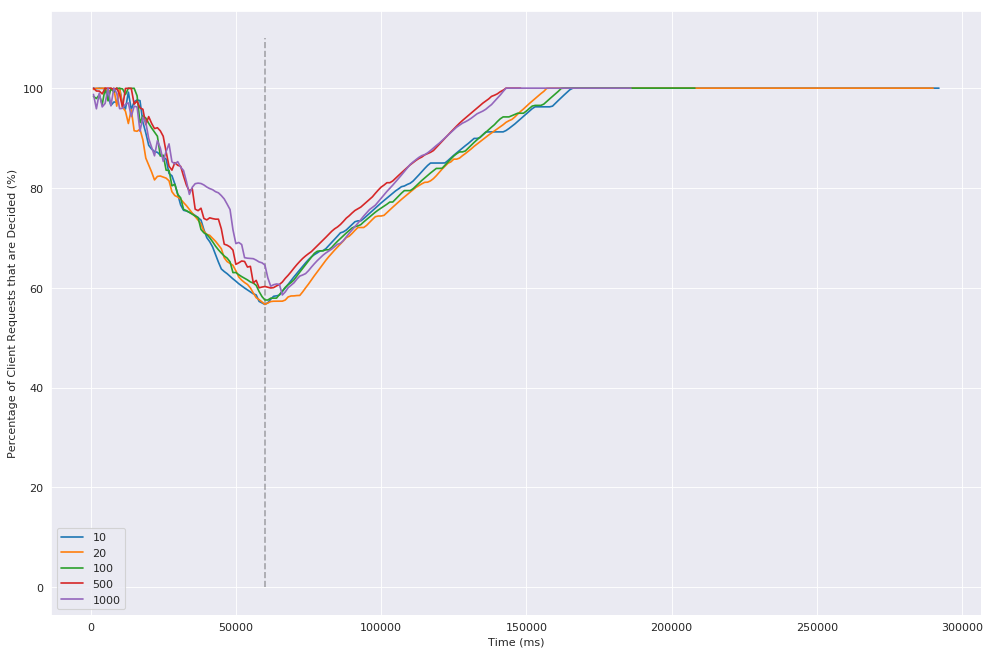

In [12]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
time_10, success_rate_10 = get_success_rate(w_10)
sns.lineplot(time_10,success_rate_10,label="10")
time_20, success_rate_20 = get_success_rate(w_20)
sns.lineplot(time_20,success_rate_20,label="20")
time_100, success_rate_100 = get_success_rate(w_100)
sns.lineplot(time_100,success_rate_100,label="100")
time_500, success_rate_500 = get_success_rate(w_500)
sns.lineplot(time_500,success_rate_500,label="500")
time_1000, success_rate_1000 = get_success_rate(w_1000)
sns.lineplot(time_1000,success_rate_1000,label="1000")
plt.vlines(60000, 0, 110,linestyle='--',alpha=0.3)
plt.xlabel('Time (ms)')
plt.ylabel('Percentage of Client Requests that are Decided (%)')
plt.show()

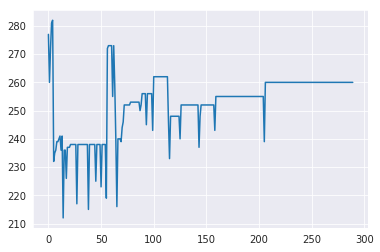

In [35]:
plt.plot(list(map(lambda x: np.sum(x['success_rate']),w_20)))
#plt.plot(list(map(lambda x: np.mean(x['updates_done']),w_20)))

In [31]:
w_20

[{'time': 1000,
  'updates_done': [393, 393, 393],
  'requests_seen': [131, 130, 133],
  'scouts_spawned': [22, 14, 13],
  'commanders_spawned': [437, 990, 1274],
  'success_rate': [97, 98, 82],
  'total_seen': 394,
  'max_lag': 1},
 {'time': 2000,
  'updates_done': [895, 895, 895],
  'requests_seen': [299, 297, 299],
  'scouts_spawned': [25, 17, 15],
  'commanders_spawned': [2289, 2555, 1924],
  'success_rate': [99, 73, 88],
  'total_seen': 895,
  'max_lag': 0},
 {'time': 3000,
  'updates_done': [1370, 1370, 1370],
  'requests_seen': [458, 455, 458],
  'scouts_spawned': [26, 18, 16],
  'commanders_spawned': [2289, 3985, 2912],
  'success_rate': [99, 82, 91],
  'total_seen': 1371,
  'max_lag': 1},
 {'time': 4000,
  'updates_done': [1869, 1869, 1869],
  'requests_seen': [623, 622, 624],
  'scouts_spawned': [27, 19, 17],
  'commanders_spawned': [2289, 5951, 4634],
  'success_rate': [99, 88, 94],
  'total_seen': 1869,
  'max_lag': 0},
 {'time': 5000,
  'updates_done': [2349, 2349, 2349],


In [13]:
client_send_files = [('logs/client_send_experiments/broadcast_docker_output.txt',True),
                     ('logs/client_send_experiments/broadcast_local_output.txt',False),
                     ('logs/client_send_experiments/quorum_docker_output.txt',True),
                     ('logs/client_send_experiments/quorum_local_output.txt',False),
                     ('logs/client_send_experiments/roundrobin_docker_output.txt',True),
                     ('logs/client_send_experiments/roundrobin_local_output.txt',False)]

In [14]:
files = list(map(lambda x: x[0],client_send_files))

In [15]:
parsed_logs = [get_parsed_logs(file,docker)[:30] for file,docker in client_send_files]
success_rates = [get_success_rate(parsed_log) for parsed_log in parsed_logs]

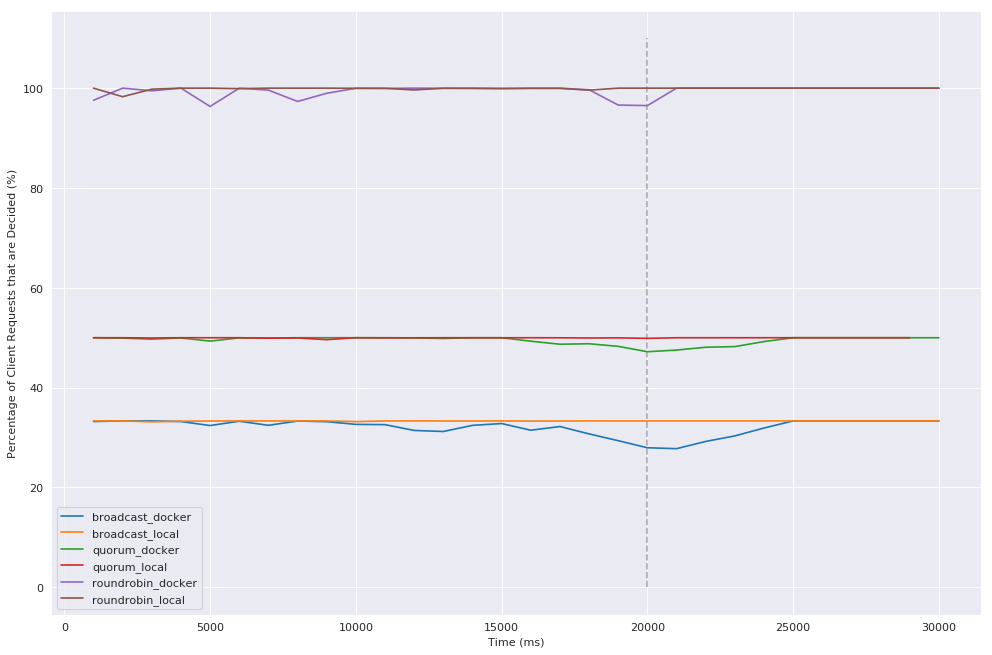

In [16]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

for file,(time,success) in zip(files,success_rates):
    label = file.split('logs/client_send_experiments/')[1][:-11]
    sns.lineplot(time, success,label=label)
plt.vlines(20000, 0, 110,linestyle='--',alpha=0.3)
plt.xlabel("Time (ms)")
plt.ylabel('Percentage of Client Requests that are Decided (%)')
plt.show()

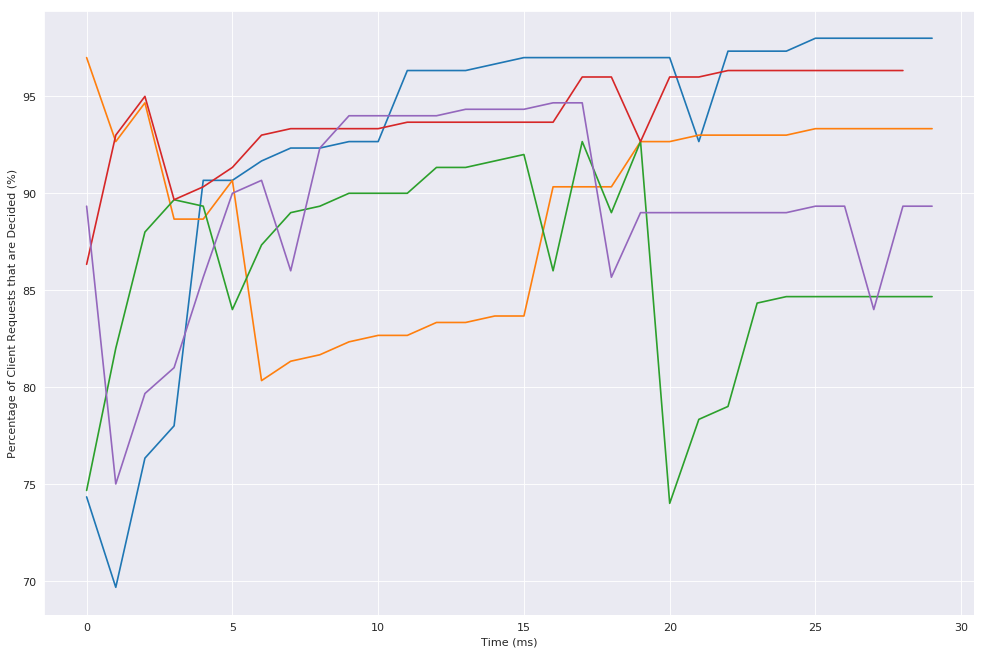

In [40]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
success_rates = [list(map(lambda x: np.mean(x['success_rate']),parse)) for parse in parsed_logs]

for file, success in zip(files,success_rates):
    #label = file.split('logs/client_send_experiments/')[1][:-11]
    plt.plot(success,label=label)
#plt.vlines(20000, 0, 110,linestyle='--',alpha=0.3)
plt.xlabel("Time (ms)")
plt.ylabel('Percentage of Client Requests that are Decided (%)')
plt.show()

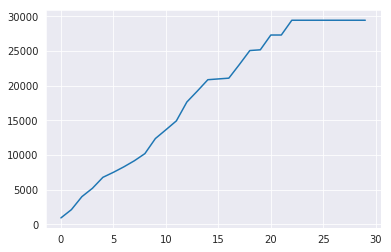

In [24]:
plt.plot(list(map(lambda x: np.mean(x['commanders_spawned']),parsed_logs[-1])))

In [18]:
files = ['logs/window_expeiment_local/w10_local_output.log',
'logs/window_expeiment_local/w20_local_output.log',
'logs/window_expeiment_local/w100_local_output.log',
'logs/window_expeiment_local/w500_local_output.log',
'logs/window_expeiment_local/w1000_local_output.log']

In [634]:
parsed_logs = [get_parsed_logs(file, False)[:65] for file in files]
success_rates = [get_success_rate(parsed_log) for parsed_log in parsed_logs]

In [25]:
parsed_logs[0]

[{'time': 1000,
  'updates_done': [278, 278, 278],
  'requests_seen': [279, 279, 279],
  'scouts_spawned': [14, 10, 10],
  'commanders_spawned': [656, 1069, 1567],
  'success_rate': [82, 50, 91],
  'total_seen': 837,
  'max_lag': 559},
 {'time': 2000,
  'updates_done': [620, 620, 620],
  'requests_seen': [620, 620, 620],
  'scouts_spawned': [16, 11, 11],
  'commanders_spawned': [1153, 1744, 2455],
  'success_rate': [46, 69, 94],
  'total_seen': 1860,
  'max_lag': 1240},
 {'time': 3000,
  'updates_done': [948, 948, 948],
  'requests_seen': [948, 948, 948],
  'scouts_spawned': [18, 13, 12],
  'commanders_spawned': [1153, 4238, 3761],
  'success_rate': [46, 87, 96],
  'total_seen': 2844,
  'max_lag': 1896},
 {'time': 4000,
  'updates_done': [1265, 1265, 1263],
  'requests_seen': [1271, 1267, 1265],
  'scouts_spawned': [19, 14, 13],
  'commanders_spawned': [1153, 6230, 5276],
  'success_rate': [46, 91, 97],
  'total_seen': 3803,
  'max_lag': 2540},
 {'time': 5000,
  'updates_done': [1551, 

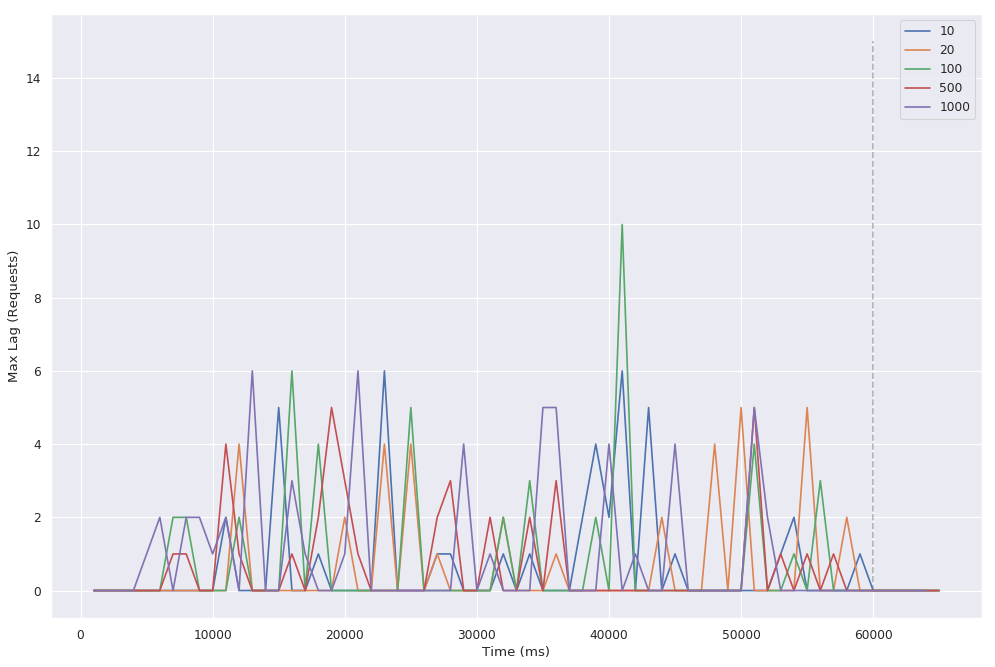

In [641]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

for file,(time,success) in zip(files,success_rates):
    label = file.split('window_expeiment_local/w')[1][:-17]
    sns.lineplot(time, success,label=label)
plt.vlines(60000, 0, 15,linestyle='--',alpha=0.3)
plt.xlabel('Time (ms)')
plt.ylabel('Max Lag (Requests)')
plt.show()